## Import du dataset

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import link
link = 'https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv'

# Load the data
data_kidney_disease = pd.read_csv(link)

## Exploration du dataset

In [69]:
data_kidney_disease.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [70]:
data_kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [71]:
data_kidney_disease.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [72]:
data_kidney_disease.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## Analyse du nombre de valeurs uniques

In [73]:
# Afficher les valeurs uniques de la colonne 'classification'
data_kidney_disease['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [74]:
# Afficher la proportion de chaque valeur de la colonne 'classification'
data_kidney_disease['classification'].value_counts(normalize=True)

classification
ckd       0.620
notckd    0.375
ckd\t     0.005
Name: proportion, dtype: float64

In [75]:
# Calculer le pourcentage de valeurs nulles pour chaque colonne
null_percentage = data_kidney_disease.isnull().mean() * 100

# Afficher le résultat
null_percentage

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

## Suppression des lignes où 'classification' est 'ckd\t', car cela pourra fausser les résultats finaux

In [76]:
data_kidney_disease = data_kidney_disease[data_kidney_disease['classification'] != 'ckd\t']

In [77]:
# Compter les valeurs après suppression
classification_counts_after_removal = data_kidney_disease['classification'].value_counts()
classification_counts_after_removal

classification
ckd       248
notckd    150
Name: count, dtype: int64

## Remplacement des valeurs aberrantes

In [78]:
# Remplacer les valeurs aberrantes
data_kidney_disease['pot'] = data_kidney_disease['pot'].replace({39.0: 3.90, 47.0: 4.70})

# Afficher le DataFrame après la modification
print(r"Après la modification:")
print(data_kidney_disease)

Après la modification:
      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  

In [79]:
# Remplacer les valeurs manquantes des variables numériques par la moyenne
data_kidney_disease.fillna(data_kidney_disease.select_dtypes(include=['number']).mean(), inplace=True)

# Remplacer les valeurs manquantes des variables catégorielles par le mode
for column in data_kidney_disease.select_dtypes(include=['object']).columns:
    data_kidney_disease[column] = data_kidney_disease[column].fillna(data_kidney_disease[column].mode()[0])

# Encoder les variables catégorielles en numériques
data_kidney_disease_encoded = pd.get_dummies(data_kidney_disease, drop_first=True)


## Analyse de la distribution

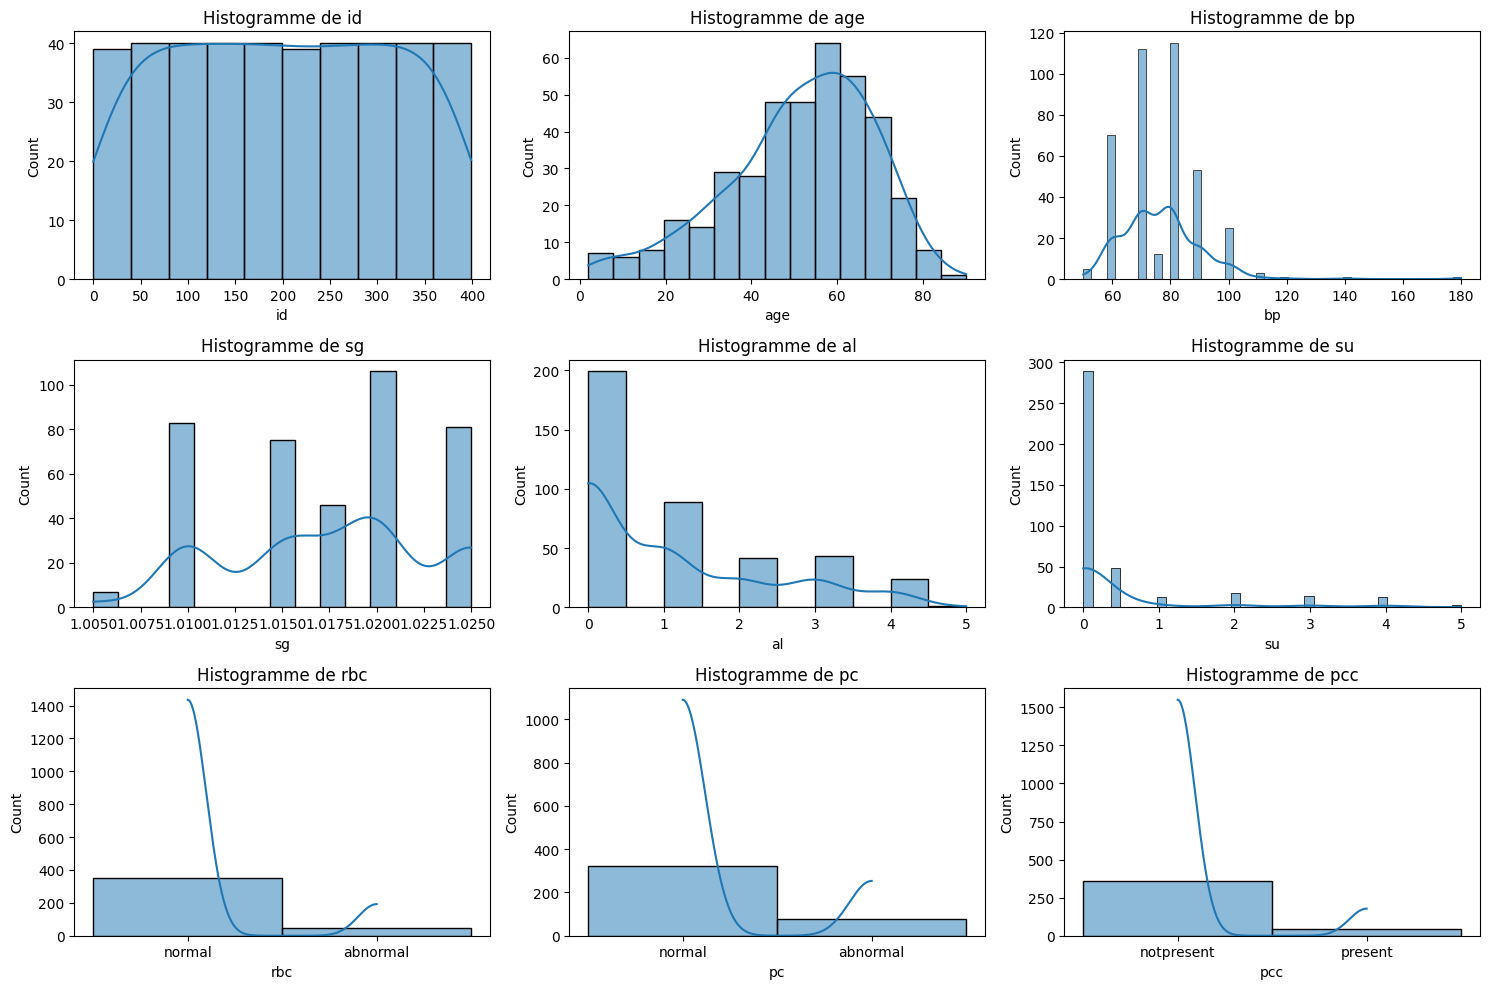

In [80]:
# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Aplatir les axes pour faciliter l'itération
axs = axs.flatten()

# Limiter le nombre de colonnes à 9
cols_to_plot = data_kidney_disease.columns[:9]

# Parcourir chaque colonne et tracer l'histogramme correspondant
for i, col in enumerate(cols_to_plot):
    sns.histplot(data_kidney_disease[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogramme de {col}')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

## Import des bibliothèques de ML

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler

In [84]:
# Remplacer les valeurs manquantes par la médiane pour les caractéristiques numériques
num_cols = data_kidney_disease.select_dtypes(include=[np.number]).columns
data_kidney_disease[num_cols] = data_kidney_disease[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)

# Pour les caractéristiques catégoriques, remplacer les valeurs manquantes par le mode
cat_cols = data_kidney_disease.select_dtypes(include=[object]).columns
data_kidney_disease[cat_cols] = data_kidney_disease[cat_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Transformer les caractéristiques non numériques en caractéristiques numériques
le = LabelEncoder()
for col in cat_cols:
    data_kidney_disease[col] = le.fit_transform(data_kidney_disease[col])

# Supprimer les colonnes non pertinentes pour l'analyse des valeurs aberrantes
data_clean = data_kidney_disease.drop(columns=['id'])

# Détecter les valeurs aberrantes en utilisant la méthode IQR
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1

# Appliquer un filtre pour détecter les valeurs aberrantes
outliers = ((data_clean < (Q1 - 1.5 * IQR)) | (data_clean > (Q3 + 1.5 * IQR)))
outliers_summary = outliers.sum()

print("\nValeurs aberrantes détectées par la méthode de l'IQR:")
print(outliers_summary)

# Supprimer les lignes contenant des valeurs aberrantes
data_kidney_disease = data_clean[~outliers.any(axis=1)]

# Séparer les caractéristiques et la cible
X = data_kidney_disease.drop(columns=['classification'])
y = data_kidney_disease['classification']

# Calculer la skewness de chaque caractéristique avant transformation
skewness_before = X.apply(skew)
print("\nSkewness avant transformation :")
print(skewness_before)

# Appliquer une transformation pour réduire la skewness pour les colonnes avec une skewness > 1 ou < -1
for col in skewness_before.index:
    if skewness_before[col] > 1 or skewness_before[col] < -1:
        X[col] = np.log1p(X[col])

# Calculer la skewness de chaque caractéristique après transformation
skewness_after = X.apply(skew)
print("\nSkewness après transformation :")
print(skewness_after)

# Séparer en jeu de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Appliquer l'undersampling aux données d'entraînement
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer le scaler aux caractéristiques (features) de l'échantillon rééquilibré
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialiser et entraîner le modèle RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled_scaled, y_resampled)

# Prédire sur le jeu de données de test
y_pred = rf.predict(X_test_scaled)

# Évaluer le modèle
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Afficher la distribution des classes avant et après l'undersampling pour information
print("\nDistribution des classes avant l'undersampling :")
print(pd.Series(y_train).value_counts())
print("\nDistribution des classes après l'undersampling :")
print(pd.Series(y_resampled).value_counts())

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\Moi\AppData\Local\Temp\ipykernel_18652\3107625422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kidney_disease[num_cols] = data_kidney_disease[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)


KeyError: "['id'] not found in axis"